Training Accuracy: 1.0
Test Accuracy: 0.42962962962962964
Classification Report:
              precision    recall  f1-score   support

          -1       0.38      0.86      0.52        42
           0       0.29      0.10      0.14        42
           1       0.72      0.35      0.47        51

    accuracy                           0.43       135
   macro avg       0.46      0.44      0.38       135
weighted avg       0.48      0.43      0.39       135

Confusion Matrix:
[[36  5  1]
 [32  4  6]
 [28  5 18]]


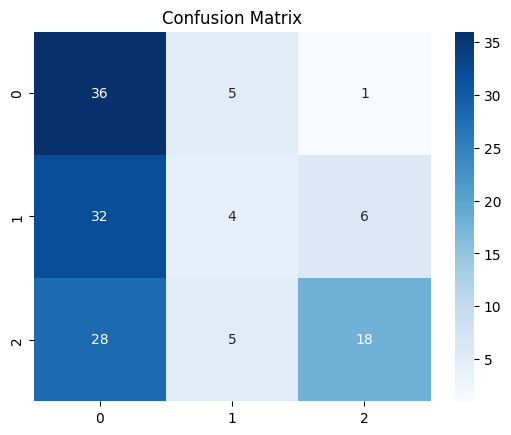

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Training Time: 488.82787680625916 seconds


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load Data
X = np.load("/kaggle/input/seed-fe-own/Shuffled/Time/shuffled_X.npy")
y = np.load("/kaggle/input/seed-fe-own/Shuffled/Time/shuffled_y.npy")

# Flatten the features
X_shape = X.shape
X = X.reshape((X_shape[0], -1))

# Train-test split and normalization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a KNN model
knn_model = KNeighborsClassifier()

# Use GridSearchCV to find the best hyperparameters and measure the training time
start_time = time.time()
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Get the best model
best_knn_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

# Training Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Classification Report
print("Classification Report:")
classification_rep = classification_report(y_test, y_test_pred)
print(classification_rep)

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

# Seaborn Heatmap for Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Print the training time
print("Training Time:", training_time, "seconds")
